Kathryn Young (kmy9ca) <br>
Machine Learning <br>
04/05/2019

# Assignment 3: Clustering California Housing with K-means

### CS 4501 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://amp.businessinsider.com/images/573de0b88d3eaea27198a55d-960-480.jpg)

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture 9 or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you (for free) from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment. 

In [1]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Your code goes here for this section.
housing = pd.read_csv("housing.csv")
housing = housing.drop(['ocean_proximity'], axis=1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [3]:
housing.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [4]:
### Drop NaN values since there are a lot of datapoints.
housing = housing.dropna()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [5]:
corr_matrix = housing.corr()
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(housing, test_size=0.2, random_state=42)

print(len(X_train), "train +", len(X_test), "test")

16346 train + 4087 test


In [7]:
### Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## scale X_train
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=['longitude', 'latitude', 'housing_median_age',
                                                          'total_rooms', 'total_bedrooms', 'population',
                                                          'households', 'median_income', 'median_house_value'])
X_train.head()

## scale X_test
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), columns=['longitude', 'latitude', 'housing_median_age',
                                                          'total_rooms', 'total_bedrooms', 'population',
                                                          'households', 'median_income', 'median_house_value'])
X_train.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.106514,0.786208,-1.162062,0.829311,0.929297,1.131110,1.040744,0.438412,0.182141
1,-0.024671,0.467873,0.348657,-0.738558,-0.850523,-0.708899,-0.856152,-0.242389,-0.836532
2,0.758045,-0.711838,-0.287435,0.587350,0.747242,0.378459,0.691525,-0.108969,0.360322
3,0.633408,-0.735245,-0.048901,-0.122742,0.989183,1.185124,1.048681,-0.861168,0.860097
4,1.151895,-1.217429,-0.128412,-0.365632,-0.345083,-0.105008,-0.247664,-0.168986,0.069148


- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include the Euclidean distance which is:
$d(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}2]{\sum\limits_{i=1}^n|x_i - y_i|^2}$

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [8]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
import operator
import math

def chunk(l, k):
    avg = len(l) / float(k)
    out = []
    last = 0.0

    while last < len(l):
        out.append(l[int(last):int(last + avg)])
        last += avg

    return out


def k_divide(k, df):                                                    ## makes dataframe into equal groups of tuples
    data_in_tuples = list(zip(*[df[c].values.tolist() for c in df]))    ## make dataframe into tuples
    divided_tuples = chunk(data_in_tuples, k)                           ## divide data tuples into k groups
    return divided_tuples
    


def random_centroids(k, df):
    divided_tuples = k_divide(k,df)                                     ## get equal groups of tuples
    centroids = []                                                      ## create centroids array
    
    for centroid in range (0,k):
        centroid_tuple = list(divided_tuples[centroid][0])                  ## get first tuple value as list
        for tup in range (1,len(divided_tuples[centroid])):             ## goes through each tuple in list
            the_tuples = list(divided_tuples[centroid])
            the_tuples = list(the_tuples[tup])
            for i in range (1, len(the_tuples)):
                centroid_tuple[i] = centroid_tuple[i] + the_tuples[i]
        
        ### get averages
        centroid_values = []
        for element in centroid_tuple:
            element = element / len(divided_tuples[centroid])
            centroid_values.append(element)
        centroids.append(centroid_values)
    
    return centroids

##assign to nearest centroid

def assign_to_centroids(centroids, df):
    # take data tuples
    df_values = df.values.tolist()
    
    # get empty array of arrays to organize data by centroid.
    data_by_centroid = []
    for p in centroids:
        data_by_centroid.append([])
    
    # place data into centroids by getting minimum distance.
    for i in df_values:
        dist_values = []
        for c in centroids:
            dist = 0
            for num in range(0, len(i)):
                dist = dist + math.pow(abs(i[num] - c[num]), 2)
            dist = math.pow(dist, 0.5)
            dist_values.append(dist)
        # assign to centroid with minimum distance
        minpos = dist_values.index(min(dist_values))
        data_by_centroid[minpos].append(i)
        
    # return clusters
    return data_by_centroid

def reassign_centroids(points_in_centroid):
    new_centroids = []
    for group in points_in_centroid:
        new_centroid = []
        # create array of 0s to add to and eventually average.
        for i in group[0]:
            new_centroid.append(0)
        # add values to array of 0s.
        for point in group:
            for val in range(0,len(point)):
                new_centroid[val] = new_centroid[val] + point[val]
        # divide by number of points in group to get average    
        for i in range(0,len(new_centroid)):
            new_centroid[i] = new_centroid[i] / len(group)
        
        new_centroids.append(new_centroid)
    return new_centroids
        
    
def k_means(k,df):
    ## begin with random centroids
    rand_centroids = random_centroids(k,df)
    
    ## Decide the class memberships of the m objects 
    ## by assigning them to the nearest cluster centroids (aka mean)
    data_by_centroid = assign_to_centroids(rand_centroids, df)

    # Re-estimate the k cluster centers, by assuming the membership 
    # found above are correct.
    reassigned_centroids = reassign_centroids(data_by_centroid)
    
    # If none of the m objects change membership in the last iteration, exit. 
    # Otherwise, go to 3.
    data_by_centroid_new = assign_to_centroids(reassigned_centroids, df)
    
    reassigned_centroids_new = reassign_centroids(data_by_centroid_new)
    
    
    while data_by_centroid != data_by_centroid_new:
        data_by_centroid = data_by_centroid_new
        reassigned_centroids = reassigned_centroids_new
        
        data_by_centroid_new = assign_to_centroids(reassigned_centroids, df)
        reassigned_centroids_new = reassign_centroids(data_by_centroid_new)
        
    print("done")
    
    clusters = data_by_centroid
    return clusters
    
clusters = k_means(2,X_train)

done


- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Write down the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Change k from 2 to 10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.

**Implementation Notes:** For each k, report the training and validation accuracy. Identify the k with the highest validation accuracy, and report the test accuracy with this choice of k. Note: if multiple values of k result in the highest validation accuracy, then report test accuracies for all such values of k. Then, plot the data points with different markers corresponding to different classes. Repeat this process for all k and discuss the smoothness of the regions as k increases.


done
[[ 0.          0.75804456 -0.71183841]
 [ 0.          0.63340827 -0.73524539]
 [ 0.          1.15189525 -1.21742909]
 ...
 [ 1.         -1.34581609  0.88451734]
 [ 1.         -1.22616525  0.90324292]
 [ 1.         -1.42059787  0.97814524]]


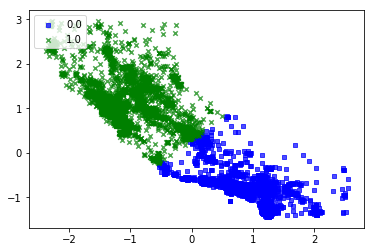

In [20]:
# Split California into Northern and Southern regions with K-Means on latitude and longitude
#from mlxtend.general_plotting import category_scatter

NS_train = X_train.drop(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
                        'median_income', 'median_house_value', 'households'], axis=1)
NS_train.head()
NS_clusters = k_means(2,NS_train)

cluster_index = 0

formatted_data = []

for c in NS_clusters:
    for data_point in c:
        the_point = []
        the_point.append(cluster_index)
        the_point.append(data_point[0])
        the_point.append(data_point[1])
        formatted_data.append(the_point)
    cluster_index += 1
    
formatted_data = np.array(formatted_data)

print(formatted_data)

fix = category_scatter(x=1, y=2, label_col=0, 
                       data=formatted_data, legend_loc='upper left')

In [15]:
import statistics

# Cluster means (per attribute)... centroid values.
cluster_means = reassign_centroids(clusters)
print("Cluster Means: ")
print(cluster_means)
print("---------------")

# SSE Calculation (per attribute)... distance formula without taking the square root
cluster_num = 0
SSE_Values = []

for c in clusters:
    indiv_clust_SSE = [0,0,0,0,0,0,0,0,0]          
    for point in c:
        for attribute in range(0, len(point)):
            indiv_clust_SSE[attribute] += math.pow(abs(point[attribute] - cluster_means[cluster_num][attribute]), 2)#  absolute value. squared
    SSE_Values.append(indiv_clust_SSE)
    cluster_num += 1

SSE_by_cluster = [] 

for clust in SSE_Values:
    cluster_SSE = 0
    for v in clust:
        cluster_SSE += v
    SSE_by_cluster.append(cluster_SSE)
    
SSE_k2 = SSE_by_cluster[0] + SSE_by_cluster[1]

print("SSE Values (by cluster): ")    
print(SSE_by_cluster)
print("---------------")
print("SSE Value for k = 2: ", SSE_k2 )
print("---------------")

# within cluster standard deviations (per attribute)
st_dev_clusters = []

for c in clusters:
    indiv_clust_numbers = [[],[],[],[],[],[],[],[],[]]
    for point in c: 
        for i in range(0, len(point)):
            indiv_clust_numbers[i].append(point[i])
    st_dev_values = []
    
    for attribute in indiv_clust_numbers:
        st_dev_values.append(statistics.stdev(attribute))
    st_dev_clusters.append(st_dev_values)

print("Standard Deviation Values: ")
print(st_dev_clusters)


Cluster Means: 
[[-0.026166727406468183, 0.02490903407046764, 0.1140854044402541, -0.25526677175331947, -0.26513680942562223, -0.2428194923105281, -0.26455783072289535, -0.022354241677300782, -0.01965295982993857], [0.19894976005986448, -0.18938731904314027, -0.8674093434441602, 1.9408335709202371, 2.015877025769759, 1.8461949399567854, 2.0114749592752443, 0.16996282908962437, 0.14942455668594337]]
---------------
SSE Values (by cluster): 
[85786.8670143635, 26575.942647200656]
---------------
SSE Value for k = 2:  112362.80966156416
---------------
Standard Deviation Values: 
[[1.0003023101439545, 1.0087023588237714, 0.9732126701842977, 0.4648968817214462, 0.4824279666025297, 0.5117965601543081, 0.4906920170442961, 1.0049063980724458, 1.0060900638993278], [0.975521865055895, 0.909658951583128, 0.7425037454299516, 1.6429130333518145, 1.4955534083713355, 1.6602650482787644, 1.481748659042742, 0.9452638509848651, 0.9395975947558]]


In [16]:
# Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. 
# You should get a plot that looks roughly in the shape of California
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter


cluster_index = 0

formatted_data = []

for c in clusters:
    for data_point in c:
        the_point = []
        the_point.append(cluster_index)
        the_point.append(data_point[0])
        the_point.append(data_point[1])
        formatted_data.append(the_point)
    cluster_index += 1

formatted_data = np.array(formatted_data)

print(formatted_data)

fix = category_scatter(x=1, y=2, label_col=0, 
                       data=formatted_data, legend_loc='upper left')
 


[[ 0.         -0.02467137  0.46787317]
 [ 0.          0.75804456 -0.71183841]
 [ 0.          0.63340827 -0.73524539]
 ...
 [ 1.         -1.0766017   1.08113594]
 [ 1.          1.01728806 -0.88036864]
 [ 1.         -1.22616525  0.90324292]]


In the plot, cluster 0 appears to be less populated and more "rural" areas. Cluster 1 appears to be more densely populated metropolitan areas. Cluster 1, based on mean values, appears to be younger, have more total rooms, more bedrooms, much higher population, more households, higher income, and higher median house value. All of these values make sense when matched up with the typical metropolitan area. A lot of young people move to these areas for work while many older people move out of these areas to retire and start families. These areas, by their nature of being heavily populated and compact would also have more bedrooms/rooms and total households. Many higher income jobs are located in these areas, which also makes the median house value high to match that. These areas also have a higher standard deviation of number of bedrooms, population, households, and median income. While there are very affluent areas in cities, there are also very poor neighborhoods with a lot of homeless people. Some neighborhoods are also very different than others in terms of size and population. 

Cluster 1 seems to encompass areas such as Los Angeles, Long Beach, Malibu, San Francisco, Sacramento, San Diego, and the other smaller cities along the coast.

Cluster 0 seems to encompass the populated areas that are much less well known and smaller in general such as Trinidad, Crescent City, Paradise, Apple Valley, and much more.

The gaps are in places where there are numerous national natural forests and parks such as Mendocino National Forest, Lassen National Forest, Plumas National Forest, Yosemite National Park, Sequoia National Forest, and Los Padres National Forest.

In [17]:
ten_clusters = k_means(10, X_train)

done


[[ 0.          0.75804456 -0.71183841]
 [ 0.          0.63340827 -0.73524539]
 [ 0.          0.60848101 -0.79142213]
 ...
 [ 9.          0.80789908 -0.77269655]
 [ 9.          0.80291363 -0.89909422]
 [ 9.          0.5785683  -0.76333376]]


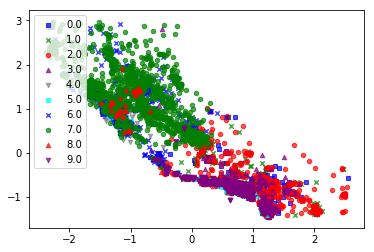

In [18]:
cluster_index = 0

ten_formatted_data = []

for c in ten_clusters:
    for data_point in c:
        the_point = []
        the_point.append(cluster_index)
        the_point.append(data_point[0])
        the_point.append(data_point[1])
        ten_formatted_data.append(the_point)
    cluster_index += 1

ten_formatted_data = np.array(ten_formatted_data)

print(ten_formatted_data)

fix = category_scatter(x=1, y=2, label_col=0, 
                       data=ten_formatted_data, legend_loc='upper left')

In [21]:
# Record cluster means and standard deviations. 

# Cluster means (per attribute)... centroid values.
ten_cluster_means = reassign_centroids(ten_clusters)
print("Cluster Means: ")
print(ten_cluster_means)
print("---------------")

# within cluster standard deviations (per attribute)
ten_st_dev_clusters = []

for c in ten_clusters:
    indiv_clust_numbers = [[],[],[],[],[],[],[],[],[]]
    for point in c: 
        for i in range(0, len(point)):
            indiv_clust_numbers[i].append(point[i])
    st_dev_values = []
    
    for attribute in indiv_clust_numbers:
        st_dev_values.append(statistics.stdev(attribute))
    ten_st_dev_clusters.append(st_dev_values)

print("Standard Deviation Values: ")
print(ten_st_dev_clusters)



Cluster Means: 
[[0.8366875096345413, -0.8131229005253588, -0.4871650752150876, 0.603114711418482, 0.8175344077073486, 0.8318366722844286, 0.8158858843434973, -0.21020108996797876, -0.12418043113468995], [0.7428487117815906, -0.7701231321986425, 0.7650714431657408, -0.4943779328895159, -0.4249831233735483, -0.2728297268272684, -0.4137697666112925, -0.4757017143495465, -0.415895155470999], [0.870744276939628, -0.7594527946020616, -0.8987393710413366, -0.3451644687870815, -0.31494505116553817, -0.316933672374546, -0.3421279169575961, -0.24455315761961902, -0.46912250423099566], [0.09868379010150424, -0.0902783701323436, -0.9696468024792778, 2.4972178884962806, 2.572206719253216, 2.31611476555641, 2.5708999575985434, 0.2157072584914437, 0.14849479752338077], [-1.2985259562894, 0.9426611252569058, 0.8047179465909569, -0.28281038847515416, -0.3515942261989282, -0.4097054456678801, -0.3339316058714942, 0.4566901593095724, 0.9254954944772643], [-0.14349876103765605, -0.08791853683543134, -0.0

There are new additional patterns that emerged. The algorithm did clearly identify Silicon Valley Area and San Francisco as different clusters. San Francisco seemed to be in cluster 6, while Sillicon Valley area seemed to be mostly in cluster 9. There also appear to be new differences in the look of the Southern California coastal region. Rather than most of the neighborhoods being classified in one cluster that clearly denoted the metropolitan areas, there are many different clusters in the area, picking out individual differences between slightly different areas, as well as differences within areas themselves (i.e. how Los Angeles and the other southern California cities have multiple clusters that look essentially on top of each other).

In [ ]:
def get_SSE(clusters, k):
    # SSE Calculation (per attribute)... distance formula without taking the square root
    
    cluster_means = reassign_centroids(clusters)
    cluster_num = 0
    SSE_Values = []

    for c in clusters:
        indiv_clust_SSE = [0,0,0,0,0,0,0,0,0]          
        for point in c:
            for attribute in range(0, len(point)):
                indiv_clust_SSE[attribute] += math.pow(abs(point[attribute] - cluster_means[cluster_num][attribute]), 2)#  absolute value. squared
        SSE_Values.append(indiv_clust_SSE)
        cluster_num += 1

    SSE_by_cluster = [] 

    for clust in SSE_Values:
        cluster_SSE = 0
        for v in clust:
            cluster_SSE += v
        SSE_by_cluster.append(cluster_SSE)

    SSE_k = 0
    for i in SSE_by_cluster:
        SSE_k += i

    print("SSE Value for k = ", k, " = ", SSE_k )
    return SSE_k
    
clusters2 = k_means(2, X_train)
clusters3 = k_means(3, X_train)
clusters4 = k_means(4, X_train)
clusters5 = k_means(5, X_train)
clusters6 = k_means(6, X_train)
clusters8 = k_means(8, X_train)
clusters9 = k_means(9, X_train)
clusters10 = k_means(10, X_train)

k2 = get_SSE(clusters2, 2)
k3 = get_SSE(clusters3, 3)
k4 = get_SSE(clusters4, 4)
k5 = get_SSE(clusters5, 5)
k6 = get_SSE(clusters6, 6)
k8 = get_SSE(clusters8, 8)
k9 = get_SSE(clusters9, 9)
k10 = get_SSE(clusters10, 10)

In [ ]:
x = [2, 3, 4, 5, 6, 8, 9, 10]
y = [k2, k3, k4, k5, k6, k8, k9, k10]
plt.plot(x, y)
plt.show()

There appear to be multiple elbows in the graph. The one that I am looking at to choose the value of k is the one that is at k = 8.

- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge. 



There is a housing crisis in California, but the crisis is much worse in some areas than in others, mainly metropolitan areas where a lot of the tech insdustry is. Silicon Valley and San Francisco have huge problems with wildly high housing costs, especially. Los Angeles is also a high rent area. Having closer to 10 clusters allowed us to pick out more specific problem areas than having 2 clusters did. It seems like a big reason areas like Silicon Valley and San Francisco have such problems is partially because of the booming technology industry and the high income that people in technology earn. A potential solution could be increasing the supply of housing in California. If supply goes up, prices should fall by economics. To help this, construction costs could be cut as well by finding innovative and cost-effective new ways to build. The government could also increase spending on affordable housing.

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4501 Assignment 3:...".

Best of luck and have fun!